# Submitted by 2347126_L Vinay Kumar Reddy

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
file_path = "E:/5TH_SEM/NNDL/HistoricalQuotes.csv"
data = pd.read_csv(file_path)

# Focus on the 'Close/Last' column and remove dollar signs
data = data.iloc[::-1]
data['Close/Last'] = data[' Close/Last'].replace(r'[\$,]', '', regex=True).astype(float)

close_prices = data['Close/Last'].values.reshape(-1, 1)

# Normalize the 'Close' price data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Display shapes for verification
train_data.shape, test_data.shape


((2014, 1), (504, 1))

In [5]:
import numpy as np

# Define sequence length
sequence_length = 60

# Function to create sequences and corresponding labels
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])  # sequence of prices
        y.append(data[i, 0])                    # target price (next day)
    return np.array(X), np.array(y)

# Create training sequences and labels
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Display shapes to confirm successful sequence creation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1954, 60)
y_train shape: (1954,)
X_test shape: (444, 60)
y_test shape: (444,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model = Sequential([
    SimpleRNN(units=50, input_shape=(X_train.shape[1], 1)),  # RNN layer with 50 units
    Dense(units=1)                                           # Dense layer for regression output
])

# Compile the model with MSE loss and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()


c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Two Layers: A SimpleRNN layer with 50 units and a Dense layer with 1 unit.

SimpleRNN Layer: Learns patterns over 60-day sequences, with 2,600 parameters.

Dense Layer: Outputs a single predicted price, with 51 parameters.

Total Parameters: 2,651 trainable parameters.

Purpose: Predicts the next days stock price based on the last 60 days, with a simple structure to avoid overfitting on small datasets.

In [7]:
# Reshape X_train and X_test to fit the RNN input requirements
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0294 - val_loss: 0.0202
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9765e-04 - val_loss: 0.0131
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7683e-04 - val_loss: 0.0105
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5741e-04 - val_loss: 0.0088
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3128e-04 - val_loss: 0.0072
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2047e-04 - val_loss: 0.0058
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4270e-04 - val_loss: 0.0063
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9053e-05 - val_loss: 0.0050
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6410e-05 - val_loss: 0.0046
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0318e-05 - val_loss: 0.0046
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7276e-05 - val_loss: 0.0034
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━

The model successfully learns from the data, reducing both training and validation loss steadily.

The small difference between training and validation losses throughout indicates that the model generalizes well to new data.

This performance suggests the model can accurately predict stock prices based on the training it received, with minimal overfitting by the final epochs.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


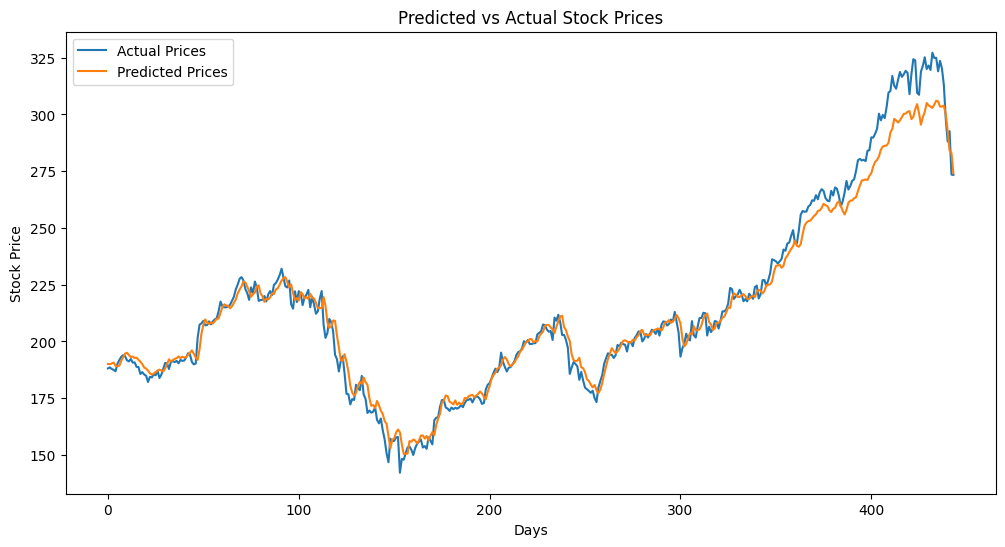

In [8]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.legend()
plt.show()


Close Match: The predicted prices (orange line) are close to the actual prices (blue line) for most of the graph, showing good model performance.

Good Trend Tracking: The model accurately follows the overall up-and-down trends in stock prices.

Slight Lag in Sharp Rises: When the actual price rises quickly (around index 300-400), the predicted prices lag a little behind.

Underestimation in Decline: Toward the end, the model underestimates a sharp decline, showing a smaller drop than the actual price.

Overall Accuracy: The model generally does a good job, especially in stable periods, with minor differences during rapid price changes.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

# Output MAE and RMSE with labels
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Error (MAE): 4.795732564840231
Root Mean Squared Error (RMSE): 6.971446037574617


Average Prediction Error: The model’s predictions are, on average, about 4.80 units off from actual stock prices, showing good accuracy.

Consistency in Predictions: The RMSE of 6.97 is close to the MAE, meaning the model generally avoids large errors and provides consistent predictions.